# 0. Libraries

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from agents.semigradient_sarsa import SemiGradientSarsa
from utils.tile_coding import mc_tile_encoding, IHT_SIZE
from utils.utils_fct import plot_moving_averages, process_json

# 1. Testing the agent

In [5]:
env = gym.make("MountainCar-v0", render_mode=None)

semig_grad_agent = SemiGradientSarsa(
    encode_fct=mc_tile_encoding,
    nb_actions=env.action_space.n,
    weights_dim=(
        env.action_space.n,
        IHT_SIZE,
    ),  # IHT_SIZE is the size of the hash table for tile encoding
)

reward_averages = []
for i in range(20):
    print(f"training {i}")
    _ = semig_grad_agent.train(
        env=env,
        alpha=0.05,
        gamma=0.99,
        epsilon=0.01,
        verbose=0,
        nb_episodes=1000,
    )
    reward_averages.append(
        semig_grad_agent.evaluate_policy(env=env, nb_episodes=10, verbose=1)
    )

print("Avg reward in evaluation for 20 training: ", np.mean(reward_averages))

training 0
Episode 1: Total Reward = -169.0
Episode 2: Total Reward = -156.0
Episode 3: Total Reward = -117.0
Episode 4: Total Reward = -116.0
Episode 5: Total Reward = -118.0
Episode 6: Total Reward = -118.0
Episode 7: Total Reward = -116.0
Episode 8: Total Reward = -118.0
Episode 9: Total Reward = -153.0
Episode 10: Total Reward = -145.0
Average Total Reward over 10 episodes: -132.6
training 1
Episode 1: Total Reward = -133.0
Episode 2: Total Reward = -132.0
Episode 3: Total Reward = -134.0
Episode 4: Total Reward = -135.0
Episode 5: Total Reward = -133.0
Episode 6: Total Reward = -109.0
Episode 7: Total Reward = -109.0
Episode 8: Total Reward = -110.0
Episode 9: Total Reward = -132.0
Episode 10: Total Reward = -108.0
Average Total Reward over 10 episodes: -123.5
training 2
Episode 1: Total Reward = -141.0
Episode 2: Total Reward = -116.0
Episode 3: Total Reward = -143.0
Episode 4: Total Reward = -140.0
Episode 5: Total Reward = -145.0
Episode 6: Total Reward = -117.0
Episode 7: Tota

# 2. Tuning agent

## 2.1. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

In [ ]:
glei_dict = semig_grad_agent.grid_search(
    env=env,
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=0,
)

noglei_dict = semig_grad_agent.grid_search(
    env=env,
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=False,
    verbose=0,
)

data_dict = {**glei_dict, **noglei_dict}
process_json(
    "./data/semi-gradient_sarsa/glei_vs_noglei_1k_ep", "w", data_dict=data_dict
)

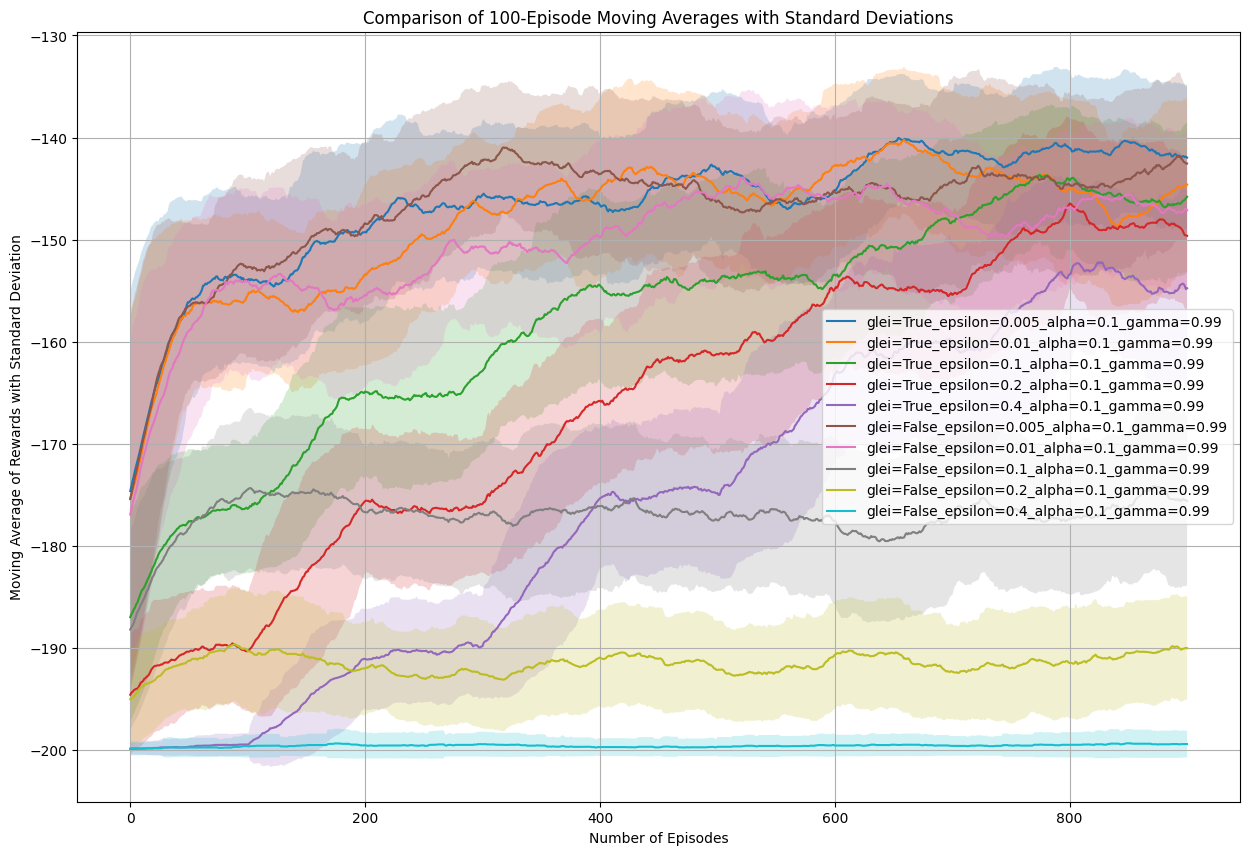

In [8]:
plot_moving_averages(
    process_json("./data/semi-gradient_sarsa/glei_vs_noglei_1k_ep", "r"),
    nb_episodes=1000,
    window_size=100,
)

## 2.2. Searching best $\alpha$ for Semi-Graident SARSA Agent

In [ ]:
alpha_dict = semig_grad_agent.grid_search(
    alpha_values=[0.001, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)
process_json(
    "./src/data/semi-gradient_sarsa/alpha_search_epsilon=0.005_glei=true",
    "w",
    data_dict=alpha_dict,
)

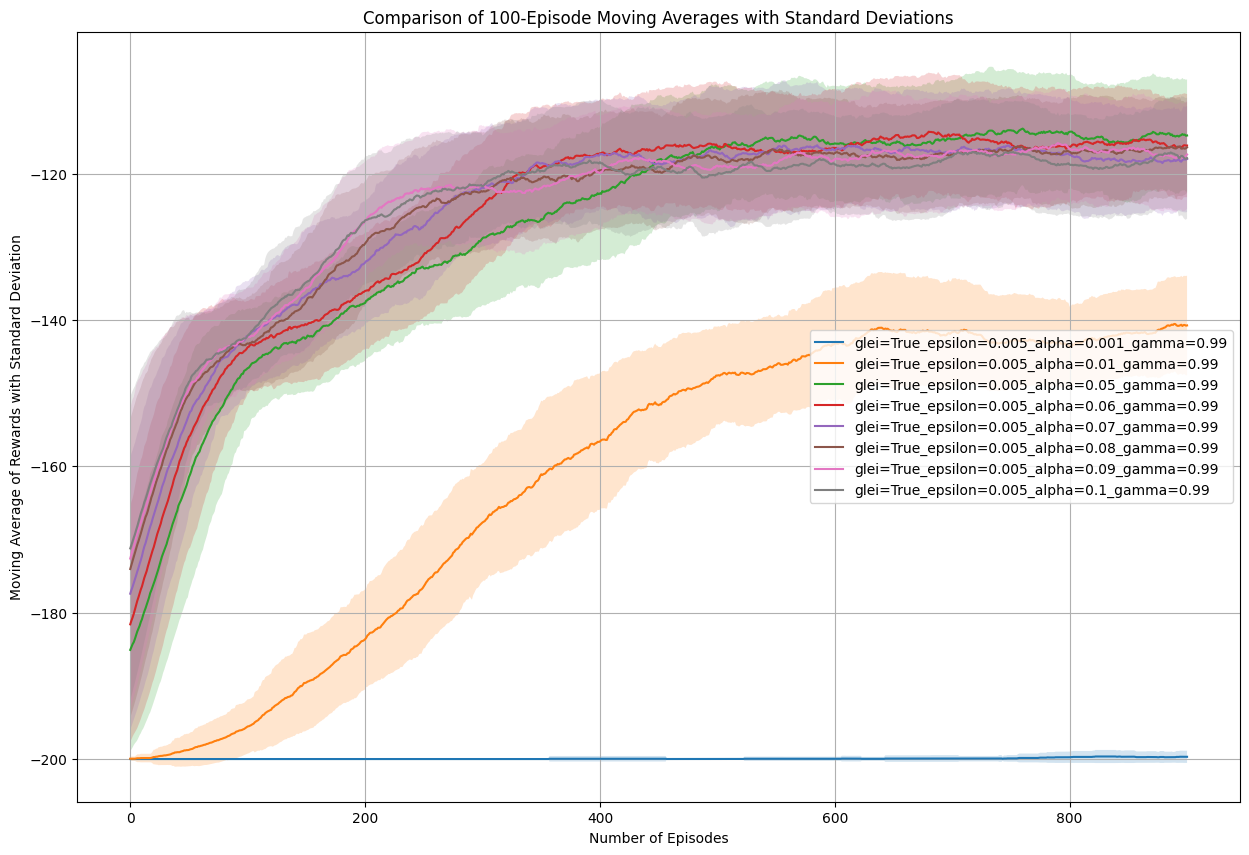

In [7]:
plot_moving_averages(
    process_json(
        "./src/data/semi-gradient_sarsa/alpha_search_epsilon=0.005_glei=true", "r"
    ),
    nb_episodes=1000,
    window_size=100,
)